In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('EV_population.csv')
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2018,Brevard,FL,Passenger,0,1,1,109,110,0.91
1,March 31 2021,Pinellas,FL,Passenger,1,1,2,113,115,1.74
2,August 31 2020,Shasta,CA,Passenger,1,0,1,36,37,2.70
3,June 30 2020,Bucks,PA,Passenger,1,0,1,24,25,4.00
4,February 28 2023,Snohomish,WA,Passenger,10907,2828,13735,528837,542572,2.53


In [13]:
df['Date']=pd.to_datetime(df['Date'])
#extract the year and month
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month


In [15]:
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month
0,2018-01-31,Brevard,FL,Passenger,0,1,1,109,110,0.91,2018,1
1,2021-03-31,Pinellas,FL,Passenger,1,1,2,113,115,1.74,2021,3
2,2020-08-31,Shasta,CA,Passenger,1,0,1,36,37,2.70,2020,8
3,2020-06-30,Bucks,PA,Passenger,1,0,1,24,25,4.00,2020,6
4,2023-02-28,Snohomish,WA,Passenger,10907,2828,13735,528837,542572,2.53,2023,2


In [17]:
df.shape

(25949, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25949 entries, 0 to 25948
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      25949 non-null  datetime64[ns]
 1   County                                    25851 non-null  object        
 2   State                                     25851 non-null  object        
 3   Vehicle Primary Use                       25949 non-null  object        
 4   Battery Electric Vehicles (BEVs)          25949 non-null  int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  25949 non-null  int64         
 6   Electric Vehicle (EV) Total               25949 non-null  int64         
 7   Non-Electric Vehicle Total                25949 non-null  int64         
 8   Total Vehicles                            25949 non-null  int64         
 9   Percent Electric Vehicles   

In [21]:
df.size

311388

In [23]:
#cehck for missing values
df.isnull().any()

Date                                        False
County                                       True
State                                        True
Vehicle Primary Use                         False
Battery Electric Vehicles (BEVs)            False
Plug-In Hybrid Electric Vehicles (PHEVs)    False
Electric Vehicle (EV) Total                 False
Non-Electric Vehicle Total                  False
Total Vehicles                              False
Percent Electric Vehicles                   False
Year                                        False
Month                                       False
dtype: bool

In [25]:
df['County']=df['County'].fillna('unknown')
df['State']=df['State'].fillna('unknown')

In [27]:
#ensure no null values
df.isnull().any()

Date                                        False
County                                      False
State                                       False
Vehicle Primary Use                         False
Battery Electric Vehicles (BEVs)            False
Plug-In Hybrid Electric Vehicles (PHEVs)    False
Electric Vehicle (EV) Total                 False
Non-Electric Vehicle Total                  False
Total Vehicles                              False
Percent Electric Vehicles                   False
Year                                        False
Month                                       False
dtype: bool

In [29]:
print(df.describe())

                                Date  Battery Electric Vehicles (BEVs)  \
count                          25949                      25949.000000   
mean   2021-07-05 09:18:12.527650304                        249.755135   
min              2017-01-31 00:00:00                          0.000000   
25%              2019-08-31 00:00:00                          0.000000   
50%              2021-08-31 00:00:00                          1.000000   
75%              2023-06-30 00:00:00                          3.000000   
max              2025-02-28 00:00:00                      92233.000000   
std                              NaN                       2785.425066   

       Plug-In Hybrid Electric Vehicles (PHEVs)  Electric Vehicle (EV) Total  \
count                              25949.000000                 25949.000000   
mean                                  84.420710                   334.175845   
min                                    0.000000                     0.000000   
25%          

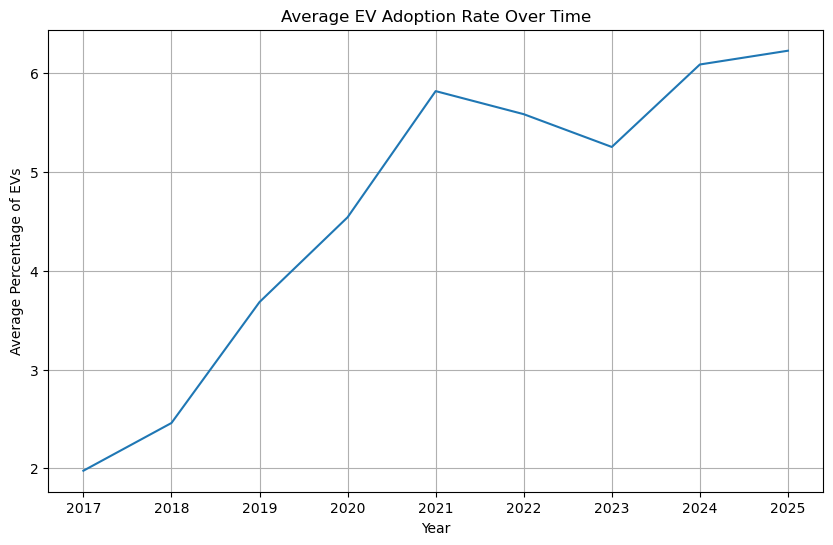

In [31]:
ev_trend = df.groupby('Year')['Percent Electric Vehicles'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_trend, x='Year', y='Percent Electric Vehicles')
plt.title('Average EV Adoption Rate Over Time')
plt.ylabel('Average Percentage of EVs')
plt.grid(True)
plt.show()

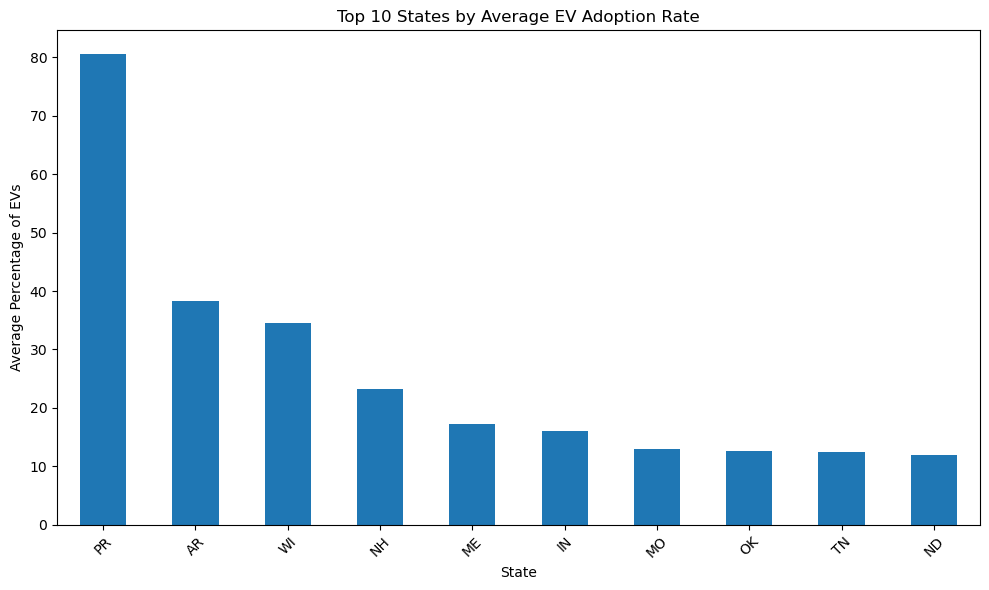

In [33]:
state_ev = df.groupby('State')['Percent Electric Vehicles'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
state_ev.plot(kind='bar')
plt.title('Top 10 States by Average EV Adoption Rate')
plt.ylabel('Average Percentage of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x2479f0897c0>,
 [Text(-1.0048440873809064, 0.5592748519785543, 'Passenger'),
  Text(0.9611552641029494, -0.5349584640765952, 'Truck')],
 [Text(-0.5679553537370339, 0.31611187285744363, '83.83%'),
  Text(0.5242665076925178, -0.291795525859961, '16.17%')])

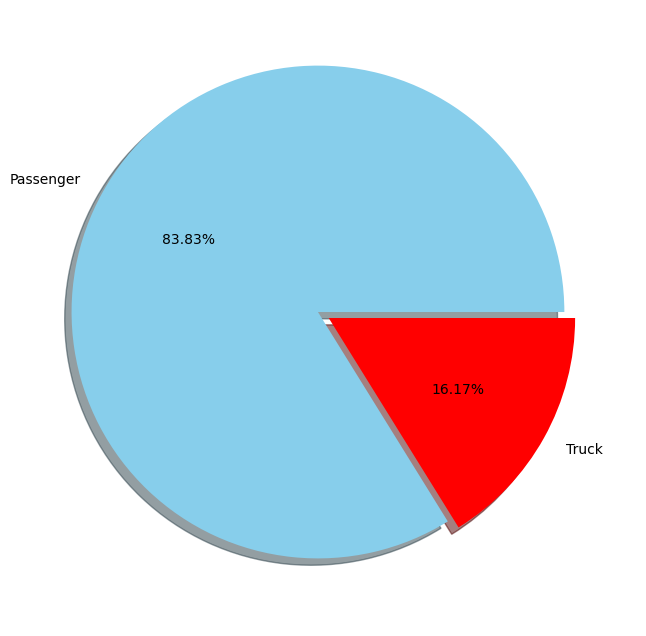

In [43]:
count = df['Vehicle Primary Use'].value_counts()

# 2. Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count, 
        labels=count.index,
        autopct='%1.2f%%',
        colors=['skyblue','red'],
        explode=(0.05, 0),shadow=True)

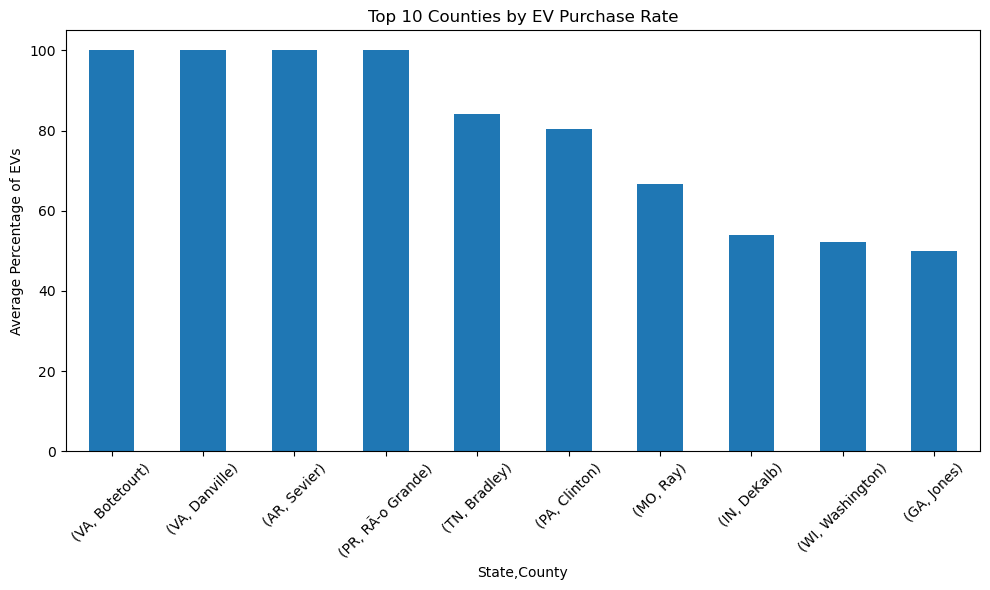

In [45]:
county_ev = df.groupby(['State', 'County'])['Percent Electric Vehicles'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
county_ev.plot(kind='bar')
plt.title('Top 10 Counties by EV Purchase Rate')
plt.ylabel('Average Percentage of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

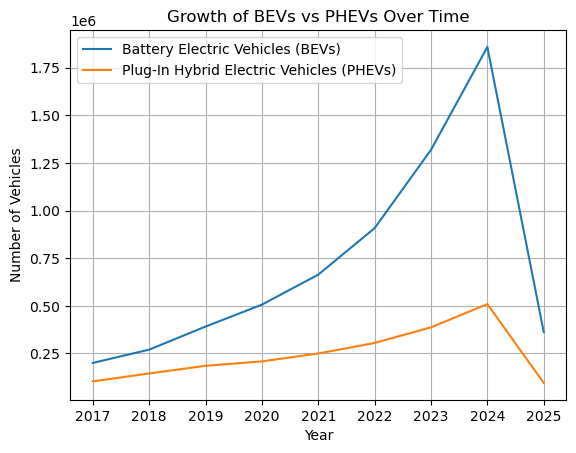

In [47]:
bev_phev = df.groupby('Year')[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].sum()
plt.figure(figsize=(10, 6))
bev_phev.plot(kind='line')
plt.title('Growth of BEVs vs PHEVs Over Time')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

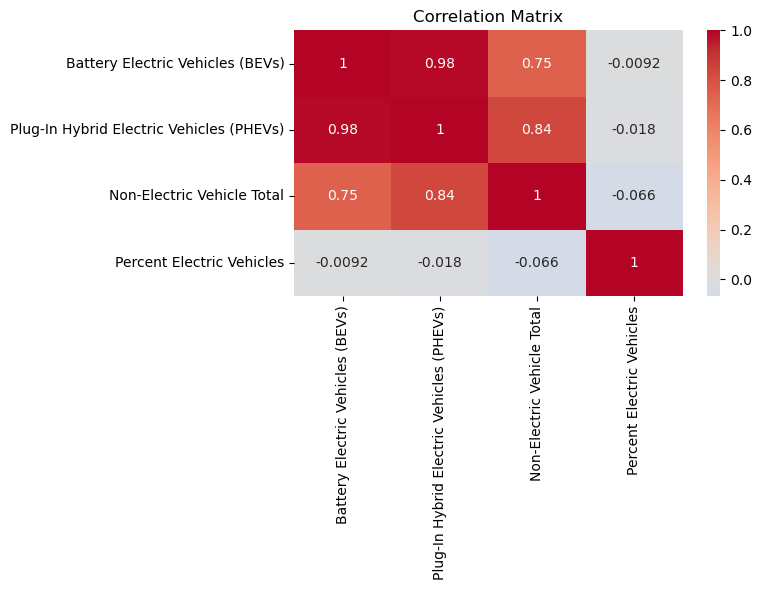

In [49]:
corr_matrix = df[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 
                  'Non-Electric Vehicle Total', 'Percent Electric Vehicles']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [53]:
#comparison of ELectric vehicle total and Non-Electric Vehicle Total based on yearly purchase
yearly_totals = df.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum'
}).reset_index()

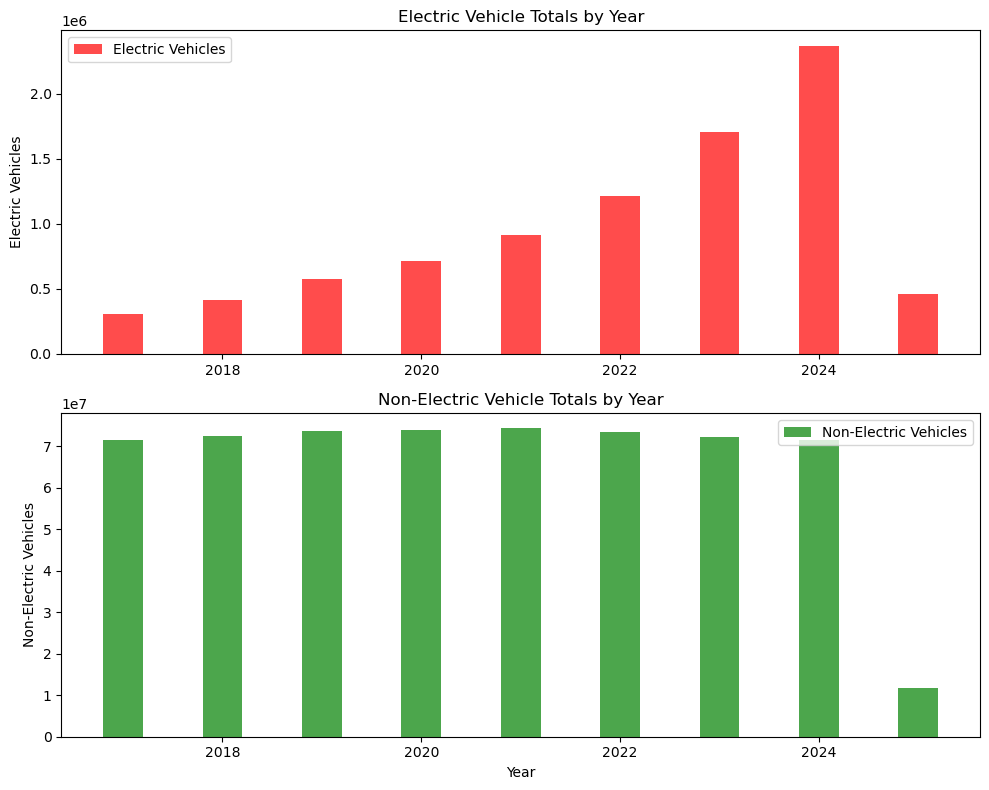

In [63]:
#comparison between ELecti
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
axes[0].bar(yearly_totals['Year'], yearly_totals['Electric Vehicle (EV) Total'], 
            width=0.4, label='Electric Vehicles', alpha=0.7, color='blue')
axes[0].set_ylabel("Electric Vehicles")
axes[0].set_title("Electric Vehicle Totals by Year")
axes[0].legend()

axes[1].bar(yearly_totals['Year'], yearly_totals['Non-Electric Vehicle Total'], 
            width=0.4, label='Non-Electric Vehicles', alpha=0.7, color='green')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Non-Electric Vehicles")
axes[1].set_title("Non-Electric Vehicle Totals by Year")
axes[1].legend()

plt.tight_layout()
plt.show()

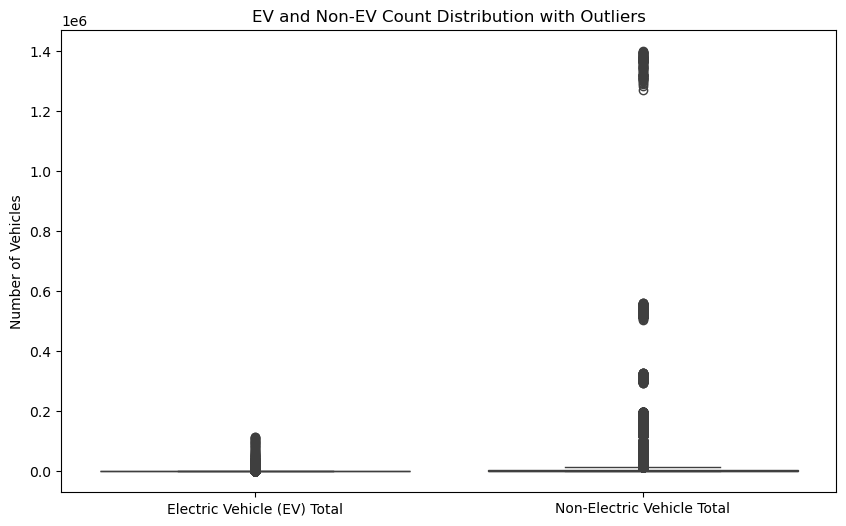

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total']])
plt.title('EV and Non-EV Count Distribution with Outliers')
plt.ylabel('Number of Vehicles')
plt.show()

In [67]:
#Outlier detection and handling
for i in ['Electric Vehicle (EV) Total','Non-Electric Vehicle Total']:
    Q1=df[i].quantile (0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[i]<lower_bound)|(df[i]>upper_bound)]
    print(F"outliers for  {i} and non Electric vehicle : ")
    print(outliers[[i]])

outliers for  Electric Vehicle (EV) Total and non Electric vehicle : 
       Electric Vehicle (EV) Total
4                            13735
12                              99
13                              25
20                            3994
27                             960
...                            ...
25925                         5160
25926                           87
25928                          394
25938                           12
25948                          258

[4821 rows x 1 columns]
outliers for  Non-Electric Vehicle Total and non Electric vehicle : 
       Non-Electric Vehicle Total
4                          528837
12                          21818
20                         550650
27                          48953
28                          35220
...                           ...
25920                       15130
25925                      532506
25928                       21896
25936                       43549
25948                      165689

[5088 r

In [69]:

# Define columns to process
columns = ['Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total']

# Store original data for comparison
df_original = df.copy()

# Cap outliers using IQR method
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[col] = df[col].clip(lower_bound, upper_bound)

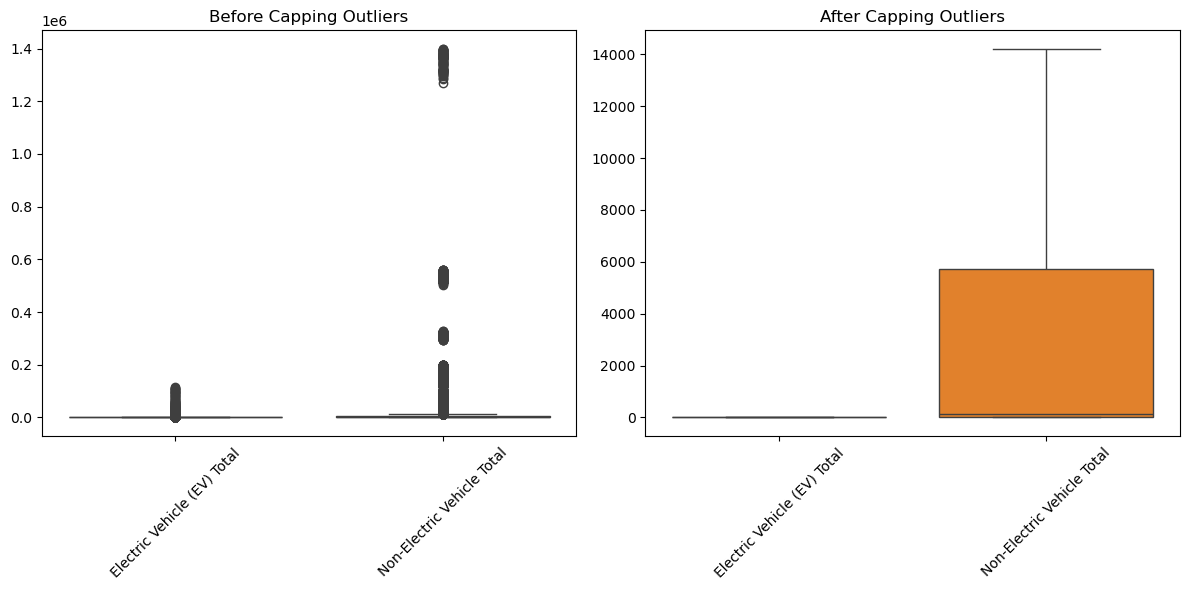

In [71]:
plt.figure(figsize=(12, 6))

# Before capping
plt.subplot(1, 2, 1)
sns.boxplot(data=df_original[columns])
plt.title('Before Capping Outliers')
plt.xticks(rotation=45)

# After capping
plt.subplot(1, 2, 2)
sns.boxplot(data=df[columns])
plt.title('After Capping Outliers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()